In [11]:
import os
import sys

import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data_points = [
    (512, 16),
    (32, 512),
    (16, 1024),
    (128, 128),
    (256, 32),
]

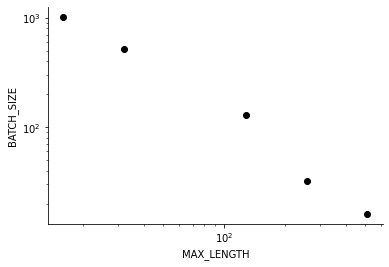

In [15]:
max_lengths, batch_sizes = zip(*data_points) 
plt.plot(max_lengths, batch_sizes, 'ko')
plt.xlabel('MAX_LENGTH')
plt.ylabel('BATCH_SIZE')
plt.yscale('log')
plt.xscale('log')
sns.despine()

In [13]:
lr = sp.stats.linregress(np.log(max_lengths), np.log(batch_sizes))
lr.slope, lr.intercept, lr.rvalue**2, lr.pvalue

(-1.2209302325581395,
 10.437506963082898,
 0.98613595706619,
 0.0006957284520379413)

In [36]:
def batch_size_estimate(max_length):
    log_bs = -1.2209302325581395*np.log(max_length)+10.437506963082898
    bs = np.exp(log_bs)
    power = np.log2(bs)
    return 2**round(power)

batch_size_estimate(512)

16

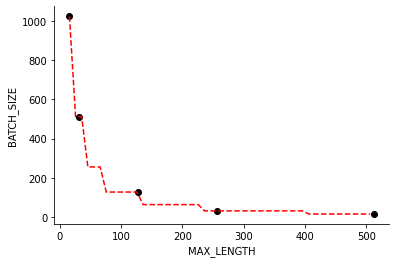

In [37]:
max_lengths, batch_sizes = zip(*sorted(data_points))

sim_max_lengths = range(min(max_lengths), max(max_lengths), 10)
pred_batch_sizes = [batch_size_estimate(ml) for ml in sim_max_lengths]

plt.plot(max_lengths, batch_sizes, 'ko')
plt.plot(sim_max_lengths, pred_batch_sizes, 'r--')

plt.xlabel('MAX_LENGTH')
plt.ylabel('BATCH_SIZE')
# plt.yscale('log')
# plt.xscale('log')
sns.despine()